# Machine Learning


## El bosque: Inteligencia Artificial
Visto en un campo más amplio, el Machine Leaning o Aprendizaje Automático es un subconjunto de la Inteligencia Aritificial.

<img src="images/Diapositiva1.jpeg" width="700" height="400">

La imagen que antecede nos muestra varios componentes de la Inteligencia Artificial (IA) donde tenemos:

- **Supervised Learning**: Aprendizaje supervisado, se presenta en un círculo más grande puesto que es el que ha tenido más penetración en distintas aplicaciones, tanto desde la perspectiva de aplicaciones en la industria así como avances dado por la comunidad de desarrolladores y la academia. Hoy es posible hacer aprendizaje supervisado de alto nivel en un computador personal.

- **Unsupervised Learning**: Aprendizaje no supervisado, menos popular pero también con aplicaciones en distintas áreas.

- **Reinforcement Learning**: Aprendizaje por refuerzo, *inspirada en la psicología conductista, cuya ocupación es determinar qué acciones debe escoger un agente de software en un entorno dado con el fin de maximizar alguna noción de "recompensa" o premio acumulado*.

- **Generative IA**: Inteligencia Artificial Generativa, tiene por objetivo la generación de texto, imágenes u otros medios en respuesta a comandos.


Es importante mencionar que la Inteligencia Artificial Generativa está teniendo un gran impacto en distintas aplicaciones, pero el desarrollo de este tipo de IA es limitado a empresas con grandes capitales. Esto se debe a que se estima que desarrollar requiere de una inversión de alrededor de USD 500 millones.

## Machine Learning

Es un conjunto amplio de herramientas para entender y descrubrir estructras en los datos. Estas herramientas se clasifican en **supervisadas** y **no supervisadas**.

<img src="images/Diapositiva2.jpeg" width="700" height="400">

### Terminología

El **aprendizaje supervisado** implica la construcción de un modelo estadístico para **predecir** o estimar un resultado en función de una o más variables de entrada. Podemos considerar el aprendizaje supervisado como el uso de una función que asigna variables de entrada a un resultado.

- Las **variables de entrada** tienen muchos nombres, como: x, explicativa (*explanatory*), predictora (*predictor*), regresora (*regressor*), independiente y característica (*feature*).

- La **variable de salida** también tiene muchos nombres, como: y, respuesta (*response*), dependiente, objetivo (*target*), resultado y etiqueta (*label*).


En el **aprendizaje no supervisado**, hay entradas pero no salidas supervisadas; no obstante, podemos aprender relaciones y estructuras a partir de esos datos. Los problemas de aprendizaje no supervisado que cubrimos se dividen en dos grandes categorías:

- La **reducción de dimensionalidad** es una técnica para transformar datos de alta dimensión en un espacio de baja dimensión, preservando al mismo tiempo las propiedades útiles de los datos.

- La agrupación en **clústeres** o conglomerados es una técnica que implica encontrar subgrupos, o clústeres, en un conjunto de datos de modo que las observaciones dentro del mismo grupo sean bastante *similares* entre sí, mientras que las observaciones en diferentes grupos sean bastante *diferentes* entre sí.

## Aprendizaje Supervisado


Supongamos que observas una respuesta cuantitativa $Y$ y $p$ predictores, $X_1,X_2,\cdots,X_p$. Deseamos estimar una relación entre $Y$ y $X=(X_1,X_2,\cdots,X_p)$ que puede escribirse como:

$$
Y = f(X)+\epsilon
$$

$f$ es una fija de $X_1,X_2,\cdots,X_p$ que no conocemos, y $\epsilon$ es un término de **error aleatorio** que es independiente de $X$ y tiene media cero. En esta fórmula, $f$ representa la información sistemática que $X$ provee acerca de $Y$.

En el siguiente ejemplo, simulamos una relación entre Edad ($X$) e Ingreso ($Y$) donde

- $X\in [18,65]$
- $Y=f(X) = 1000log(X)+4000$
- $\epsilon \sim \mathcal{N}(\mu=0,\sigma=100)$

Luego truncamos los valores de Y entre 4000 y 30000 (nota que usamos `np.clip`).

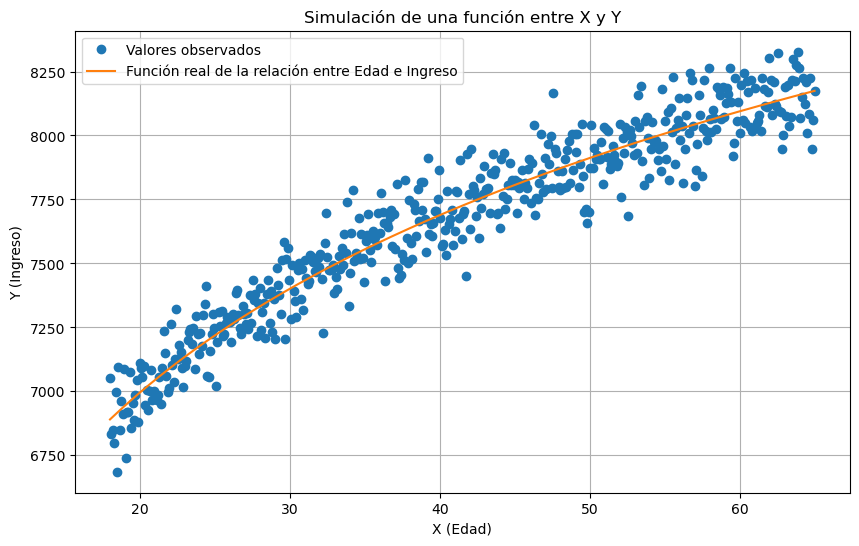

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generamos un rango de valores de X entre 18 y 65
N = 500
X = np.linspace(18, 65, N)

# Definimos una función no lineal para Y (por ejemplo, una función cuadrática)
fx = 1000*np.log(X)+ 4000
np.random.seed(1)
epsilon = np.random.normal(0, 100, N)
Y = fx+epsilon

# Limitamos los valores de Y entre 4000 y 30000
Y = np.clip(Y, 4000, 30000)

# Graficamos la función
plt.figure(figsize=(10, 6))
plt.plot(X, Y,"o", label='Valores observados')
plt.plot(X, fx, label='Función real de la relación entre Edad e Ingreso')
plt.xlabel('X (Edad)')
plt.ylabel('Y (Ingreso)')
plt.title('Simulación de una función entre X y Y')
plt.grid(True)
plt.legend()
plt.show()


En esencia, el aprendizaje supervisado es un conjunto de métodos que nos ayudan a estimar $f$. Al estimar $f$ aparecen conceptos teóricos con los que debemos familiarizarnos y también debemos tener herramientas que nos evaluar la estimación que hemos obtenido: $\hat{f}$.

### Estimar $f$

Hay dos razones para estimar $f$: predicción e inferencia.

#### Predicción

En problemas reales tenemos disponible datos de entrada $X$ y sus etiquetas $Y$ y deseamos estimar la relación entre $X$ y $Y$, para ello:

$$
\hat{Y} = \hat{f}(X)
$$

donde $\hat{f}$ representa nuestra estimación de $f$ y $\hat{Y}$ representa la predicción de $Y$.

No necesariamente debemos saber la forma funcional exacta de $\hat{f}$ siempre y cuando tengamos predicciones precisas de $Y$. Cuando esto sucede, se lo conoce como un problema de *caja negra*.

##### Error Total
En aprendizaje supervisado, el error total puede descomponerse en el **error de predicción esperado (EPE)**, que es la diferencia cuadrática esperada entre el resultado predicho $\hat{Y}$ y el resultado verdadero $Y$, es decir, el error cuadrático medio (MSE):

$$
EPE(X) = \mathbb{E}[(Y - \hat{Y}(X))^2]
$$

Donde:
- $Y$ es el valor verdadero (la etiqueta).
- $\hat{Y}(X)$ es la predicción del modelo en la entrada $X$.
- $\mathbb{E}[\cdot]$ denota la esperanza.

Ahora, queremos descomponer esto en componentes de **error reducible** y **error irreducible**.

###### Error Reducible e Irreducible

Dado que la etiqueta $Y$ se puede descomponer en una parte determinista $f(X)$ y un ruido $\epsilon$, es decir:

$$
Y = f(X) + \epsilon
$$

Donde:
- $f(X)$ es la verdadera función subyacente (que intentamos aproximar con nuestro modelo).
- $\epsilon$ es un ruido aleatorio con media cero $(\mathbb{E}[\epsilon] = 0$) y varianza $\sigma^2$ ($\text{Var}[\epsilon] = \sigma^2$).

El **error total** ahora puede descomponerse en:

$$
EPE(X) = \mathbb{E}[(f(X) + \epsilon - \hat{f}(X))^2]
$$

Expandiendo esta expresión:

$$
EPE(X) = \mathbb{E}[(f(X) - \hat{f}(X))^2] + \mathbb{E}[\epsilon^2]
$$

Esto se puede interpretar como:

1. **Error Reducible**: El error debido a la incapacidad del modelo para aprender perfectamente la verdadera función \(f(x)\). Esto está representado por $\mathbb{E}[(f(X) - \hat{f}(X))^2]$.
   
2. **Error Irreducible**: El error debido al ruido inherente en los datos, es decir, $\mathbb{E}[\epsilon^2] = \sigma^2$, que no se puede reducir, sin importar cuán bien el modelo aprenda la función verdadera.

Así, el error total es:

$$
EPE(X) = \underbrace{\mathbb{E}[(f(X) - \hat{f}(X))^2]}_{\text{Error Reducible}} + \underbrace{\sigma^2}_{\text{Error Irreducible}}
$$

#### Inferencia

Cuando estamos interesados en entender la asociación entre $Y$ y $X_1,X_2,\cdots,X_p$, la estimación de $f$, $\hat{f}$ no puede ser tratado como una caja negra. Nuestro objetivo no es necesariamente hacer predicciones de $Y$, sino que necesitamos tener una forma exacta de $f$.

Podemos estar interesados en responder a preguntas como:

- ¿Qué predictores se asocian con la respuesta?
- ¿Cuál es la relación entre la respuesta y cada predictor?
- ¿Puede la relación entre $Y$ y cada predictor ser lineal o es más sofisticada?

Dependiendo de si nuestro objetivo final es predicción, inferencia o una combinación de ambas, pueden ser apropiados distintos métodos para estimar $f$. 

Por ejemplo, los modelos lineales permiten una inferencia relativamente simple e interpretable, pero pueden no producir predicciones tan precisas como algunos otros enfoques de modelos lineales. Por el contrario, algunos de los enfoques altamente no lineales pueden proporcionar predicciones bastante precisas para $Y$ , pero esto se produce a expensas de un modelo menos interpretable para el cual la inferencia es más desafiante.

### Descomposición de Sesgo-Varianza (del Error Reducible)

El error reducible se puede descomponer aún más en **sesgo** y **varianza**:

$$
\mathbb{E}[(f(X) - \hat{f}(X))^2] = (\mathbb{E}[\hat{f}(X)] - f(x))^2 + \mathbb{E}[(\hat{f}(X) - \mathbb{E}[\hat{f}(X)])^2]
$$

Donde:
- **Sesgo**: $(\mathbb{E}[\hat{f}(X)] - f(X))^2$ es el error debido a las suposiciones del modelo que le impiden capturar perfectamente la función verdadera.
- **Varianza**: $\mathbb{E}[(\hat{f}(X) - \mathbb{E}[\hat{f}(X)])^2]$ es el error debido a la sensibilidad del modelo a diferentes conjuntos de datos de entrenamiento (es decir, cuánto varían las predicciones del modelo).

Así, el error total se puede escribir como:

$$
EPE(x) = \underbrace{\text{Sesgo}^2 + \text{Varianza}}_{\text{Error Reducible}} + \underbrace{\sigma^2}_{\text{Error Irreducible}}
$$

### En síntesis

- **Error Reducible**: Esta es la parte del error que se puede reducir mejorando el modelo (por ejemplo, usando un modelo más complejo, mejor ajuste o más datos). Consiste en **Sesgo** y **Varianza**.
  
  $$
  \text{Error Reducible} = \text{Sesgo}^2 + \text{Varianza}
  $$

- **Error Irreducible**: Este es el ruido en los datos, que no se puede eliminar con ningún modelo. Está representado por la varianza del ruido $\sigma^2$.

  $$
  \text{Error Irreducible} = \sigma^2
  $$

Por lo tanto, la fórmula general para el error de predicción esperado (error total) es:

$$
EPE(x) = \text{Sesgo}^2 + \text{Varianza} + \sigma^2
$$


## Métodos de remuestreo

Los **métodos de remuestreo** son una herramienta indispensable en la estadística moderna. Implican extraer repetidamente muestras de un conjunto de **entrenamiento** y reajustar un modelo de interés en cada muestra para obtener información adicional sobre el modelo ajustado.

Dos métodos más usados en el remuestreo son *bootstrap* y *cross-validation*.

**Bootstrap**

El bootstrap se utiliza en varios contextos, más comúnmente para proporcionar una **medida de precisión** de una estimación de un parámetro o de un método de aprendizaje estadístico dado.

**Cross-validation**

El proceso de evaluar el desempeño de un modelo se conoce como **evaluación del modelo**, mientras que el proceso de seleccionar el nivel adecuado de flexibilidad para un modelo se conoce como **selección del modelo**.

### Bootstrap

Supongamos que deseamos obtener el siguiente estimador 

$$
\tau = \frac{\text{median}(x)}{(\text{max}(x)-\text{min}(x))}
$$

Nota que, si el problema fuese estimar el [intervalo de confianza de la media](https://es.wikipedia.org/wiki/Intervalo_de_confianza), tenemos un procedimiento paramétrico para hacerlo (pero también podemos usar bootstrap). Sin embargo, el estimador $\tau$ no tiene un fórmula específica para estimar los intervalos de confianza, estos son los ejemplos donde bootstrap es más útil. 

In [7]:
import numpy as np
import random

edad = np.array([24,25,26,27,28,29,30,31,32,38,48])
n = edad.shape # tamaño de la población
random.seed(19)
indice = np.arange(0,n[0]) # posiciones de la población (id)
nsam = 20 # Tamaño de la muestra (generalmente es igual a n)
sam = random.choices(indice, k=nsam) # Tomamos una muestra con reemplazo
tau = np.median(edad[sam])/np.ptp(edad[sam])
tau

1.125

A mano

<Axes: ylabel='Count'>

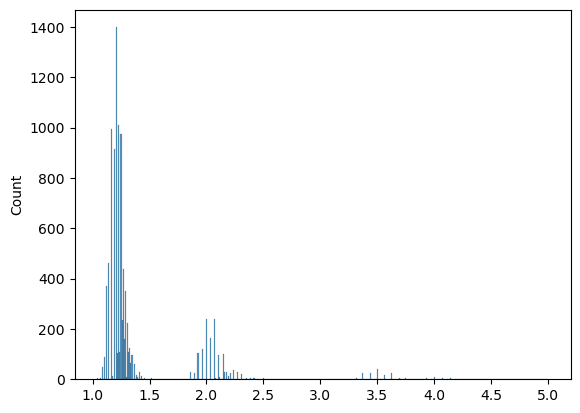

In [8]:
def tau_f(x):
    res = np.median(x)/np.ptp(x)
    return res

nboot = 9999
tau_sol = []
for i in range(0,nboot):
    sam = random.choices(indice, k=nsam)
    tau = tau_f(edad[sam])
    tau_sol.append(tau)
    
import seaborn as sns

sns.histplot(tau_sol)

Usando `bootstrap`:

<Axes: ylabel='Count'>

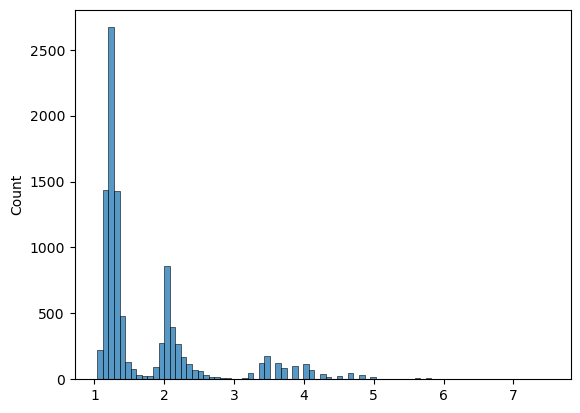

In [9]:
from scipy.stats import bootstrap
rng = np.random.default_rng()
res = bootstrap((edad,), tau_f, confidence_level=0.9, random_state=rng)
res
sns.histplot(res.bootstrap_distribution)

## Cross-validation



In [10]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import linear_model

import pandas as pd

uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/Mundo.csv"

datos = pd.read_csv(uu,sep = ";")
datos = datos[["PNB_PC","calorias","exp_vida"]]
datos = datos.dropna()
X, y = datos[["PNB_PC","calorias"]],datos.exp_vida

X.shape, y.shape



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape
X_test.shape, y_test.shape

clf = linear_model.LinearRegression().fit(X_train, y_train)

clf.score(X_test, y_test)

from sklearn.model_selection import cross_val_score #sol
clf = linear_model.LinearRegression()
scores = cross_val_score(clf, X, y, cv=10)
scores




from sklearn.model_selection import cross_validate
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = ['r2', 'neg_mean_absolute_error']
scores = cross_validate(clf, X, y, scoring=scoring)
scores


{'fit_time': array([0.00161505, 0.00170708, 0.0016582 , 0.00182509, 0.00159192]),
 'score_time': array([0.00208902, 0.00165892, 0.00253582, 0.00171089, 0.00166607]),
 'test_r2': array([-0.84695129,  0.28360126, -0.90154176,  0.6867929 , -5.11490281]),
 'test_neg_mean_absolute_error': array([-7.59750607, -7.74954156, -9.29418544, -4.25742205, -3.78002062])}